In [3]:
import pandas as pd

In [4]:
melb_house_price_df = pd.read_csv('melb_data.csv')
print('Shape of the dataframe: ', melb_house_price_df.shape)
melb_house_price_df.head(3)

Shape of the dataframe:  (13580, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the columns property of the DataFrame (the bottom line of code below).

In [5]:
melb_house_price_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
melb_house_price_df = melb_house_price_df.dropna(axis=0)

### Selecting The Prediction Target

You can pull out a variable with dot-notation. This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.

We'll use the dot notation to select the column we want to predict, which is called the prediction target. By convention, the prediction target is called y. So the code we need to save the house prices in the Melbourne data is

In [7]:
y = melb_house_price_df.Price
y

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12205     601000.0
12206    1050000.0
12207     385000.0
12209     560000.0
12212    2450000.0
Name: Price, Length: 6196, dtype: float64

### Choosing "Features"

The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

Here is an example:


In [8]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [9]:
X = melb_house_price_df[features]
X

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.80790,144.99340
2,3,2.0,134.0,-37.80930,144.99440
4,4,1.0,120.0,-37.80720,144.99410
6,3,2.0,245.0,-37.80240,144.99930
7,2,1.0,256.0,-37.80600,144.99540
...,...,...,...,...,...
12205,3,2.0,972.0,-37.51232,145.13282
12206,3,1.0,179.0,-37.86558,144.90474
12207,1,1.0,0.0,-37.85588,144.89936
12209,2,1.0,0.0,-37.85581,144.99025


Let's quickly review the data we'll be using to predict house prices using the describe method and the head method, which shows the top few rows.

In [10]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,6196.0,2.931407,0.971079,1.00000,2.000000,3.00000,4.0000,8.00000
Bathroom,6196.0,1.576340,0.711362,1.00000,1.000000,1.00000,2.0000,8.00000
Landsize,6196.0,471.006940,897.449881,0.00000,152.000000,373.00000,628.0000,37000.00000
Lattitude,6196.0,-37.807904,0.075850,-38.16492,-37.855438,-37.80225,-37.7582,-37.45709
Longtitude,6196.0,144.990201,0.099165,144.54237,144.926198,144.99580,145.0527,145.52635


Visually checking your data with these commands is an important part of a data scientist's job. You'll frequently find surprises in the dataset that deserve further inspection.

### Experimenting With Different Models¶

Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions. But what alternatives do you have for models?

You can see in scikit-learn's documentation that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth. Recall from the first lesson in this micro-course that a tree's depth is a measure of how many splits it makes before coming to a prediction. This is a relatively shallow tree

Depth 2 Tree

In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses. Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have 210

groups of houses by the time we get to the 10th level. That's 1024 leaves.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfitting.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in

### Example

There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for max_leaf_nodes:

In [14]:
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf, X_train, X_val, y_train, y_val):
    melb_model = DecisionTreeRegressor(max_leaf_nodes = max_leaf,
                                       random_state = 42)
    melb_model.fit(X = X_train,
                   y = y_train)

    # get prediction prices on validation data
    val_predictions = melb_model.predict(X = X_val)

#     # mean absolute error
#     mean_absolute_error(y_true = y_val,
#                         y_pred = val_predictions)
    return mean_absolute_error(y_true = y_val,
                        y_pred = val_predictions)
    

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size = 0.2,
                                                  random_state = 42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(4956, 5)
(1240, 5)
(4956,)
(1240,)


In [16]:
mae_list = []
max_leaf_list = [5,10,50,100,500,1000, 3000, 5000]
for j in max_leaf_list:
    mae_list.append(get_mae(j,
                            X_train,
                            X_val,
                            y_train,
                            y_val))

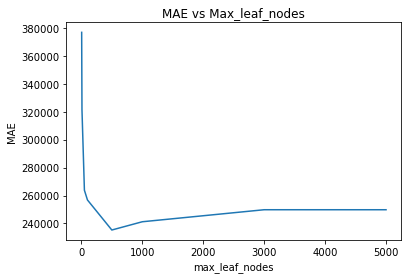

In [17]:
import matplotlib.pyplot as plt

plt.plot(max_leaf_list, mae_list)
plt.title('MAE vs Max_leaf_nodes')
plt.xlabel('max_leaf_nodes')
plt.ylabel('MAE')
plt.show()

Of the options listed, 500 is the optimal number of leaves.

### Conclusion

Here's the takeaway: Models can suffer from either:

    * Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
    * Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.

We use __validation__ data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.

### Introduction

Decision trees leave you with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

Even today's most sophisticated modeling techniques face this tension between underfitting and overfitting. But, many models have clever ideas that can lead to better performance. We'll look at the random forest as an example.

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

### Example

You've already seen the code to load the data a few times. At the end of data-loading, we have the following variables:

* train_X
* val_X
* train_y
* val_y

We build a random forest model similarly to how we built a decision tree in scikit-learn - this time using the RandomForestRegressor class instead of DecisionTreeRegressor.


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [19]:
rand_forest_model = RandomForestRegressor(random_state = 42)
rand_forest_model.fit(X = X_train,
                      y = y_train)
random_forest_prediction = rand_forest_model.predict (X = X_val)
mean_absolute_error(y_true = y_val,
                    y_pred = random_forest_prediction)

187787.19660701486

### Conclusion

There is likely room for further improvement, but this is a big improvement over the best decision tree error of 250,000. There are parameters which allow you to change the performance of the Random Forest much as we changed the maximum depth of the single decision tree. But one of the best features of Random Forest models is that they generally work reasonably even without this tuning.

You'll soon learn the XGBoost model, which provides better performance when tuned well with the right parameters (but which requires some skill to get the right model parameters).